# ***Imports***

In [1]:
%%capture
!pip install razdel
!pip install pyLDAvis
!pip install pymorphy2
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model
!pip install clean-text
from decimal import Decimal
from statistics import mean
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from PIL import Image
from io import BytesIO
import networkx as nx
from razdel import sentenize
from razdel import tokenize
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import json
import requests
from urllib.request import urlopen
import string
from tqdm.notebook import tqdm
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
import matplotlib.pyplot as plt
import matplotlib
from pymorphy2 import MorphAnalyzer
import time
from cleantext import clean
import warnings
import re
import sys
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import community
import networkx as nx
import pickle
import random
warnings.filterwarnings("ignore")

# ***Вывод графов из ЛР №1***

In [2]:
G = nx.read_edgelist('friends.txt', create_using=nx.DiGraph())                                                              # Создаём ориентированный социальный граф  
print('Количество вершин: {}'.format(G.number_of_nodes()))                                                                  # Выводим количество вершин графа
print('Количество рёбер: {}'.format(G.number_of_edges()))                                                                   # Выводим количество рёбер графа
print('Среднее количество соседей у узлов в графе: {}'.format(round(G.number_of_edges() / float(G.number_of_nodes()), 4)))  # Выводим среднее количество соседей у вершин в графе

Количество вершин: 67
Количество рёбер: 139
Среднее количество соседей у узлов в графе: 2.0746


In [3]:
G1 = nx.read_edgelist('friends.txt')                                                                                          # Создаём неориентированный социальный граф  
print('Количество вершин: {}'.format(G1.number_of_nodes()))                                                                   # Выводим количество вершин графа
print('Количество рёбер: {}'.format(G1.number_of_edges()))                                                                    # Выводим количество рёбер графа
print('Среднее количество соседей у узлов в графе: {}'.format(round(G1.number_of_edges() / float(G1.number_of_nodes()), 4)))  # Выводим среднее количество соседей у вершин в графе

Количество вершин: 67
Количество рёбер: 79
Среднее количество соседей у узлов в графе: 1.1791


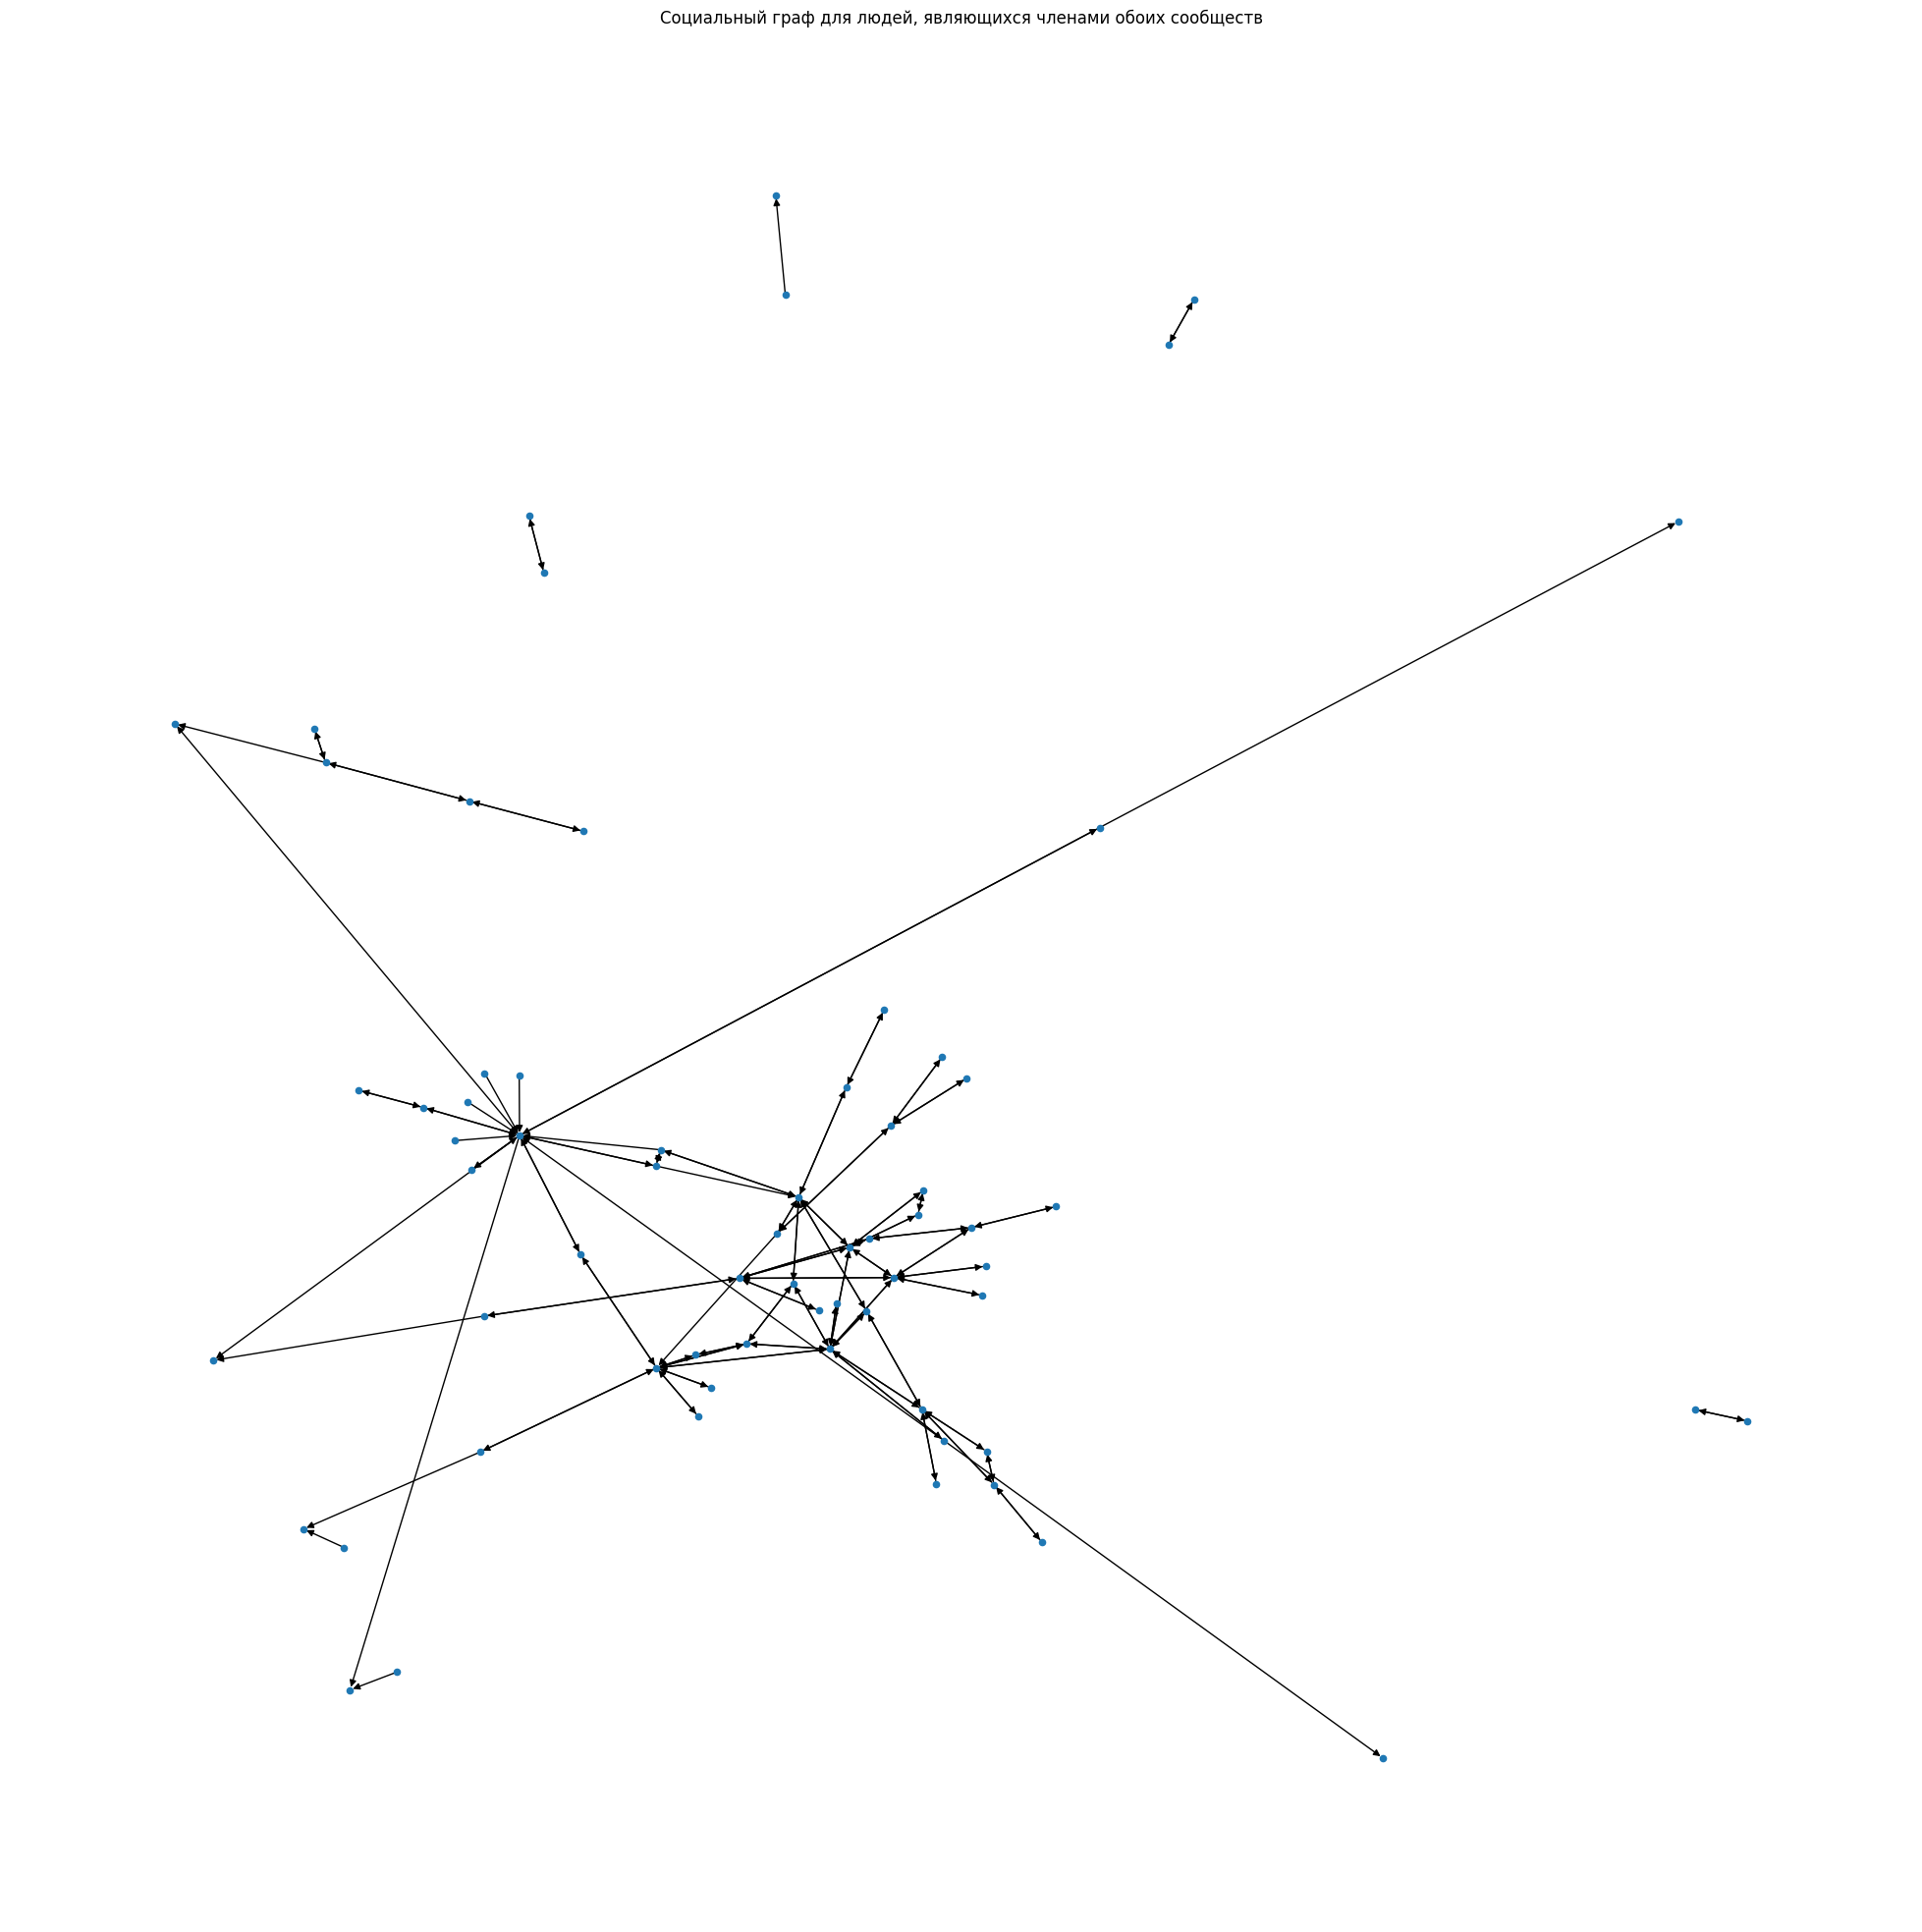

In [4]:
plt.figure(figsize=(25, 25))                                                # Задаём размер графика для ориентированного социального графа
plt.title('Социальный граф для людей, являющихся членами обоих сообществ, ориентированный') 
nx.draw(G, node_size=20)                                                    # Отрисовываем граф с размером вершины = 20
plt.show()                                                                  # Выводим граф

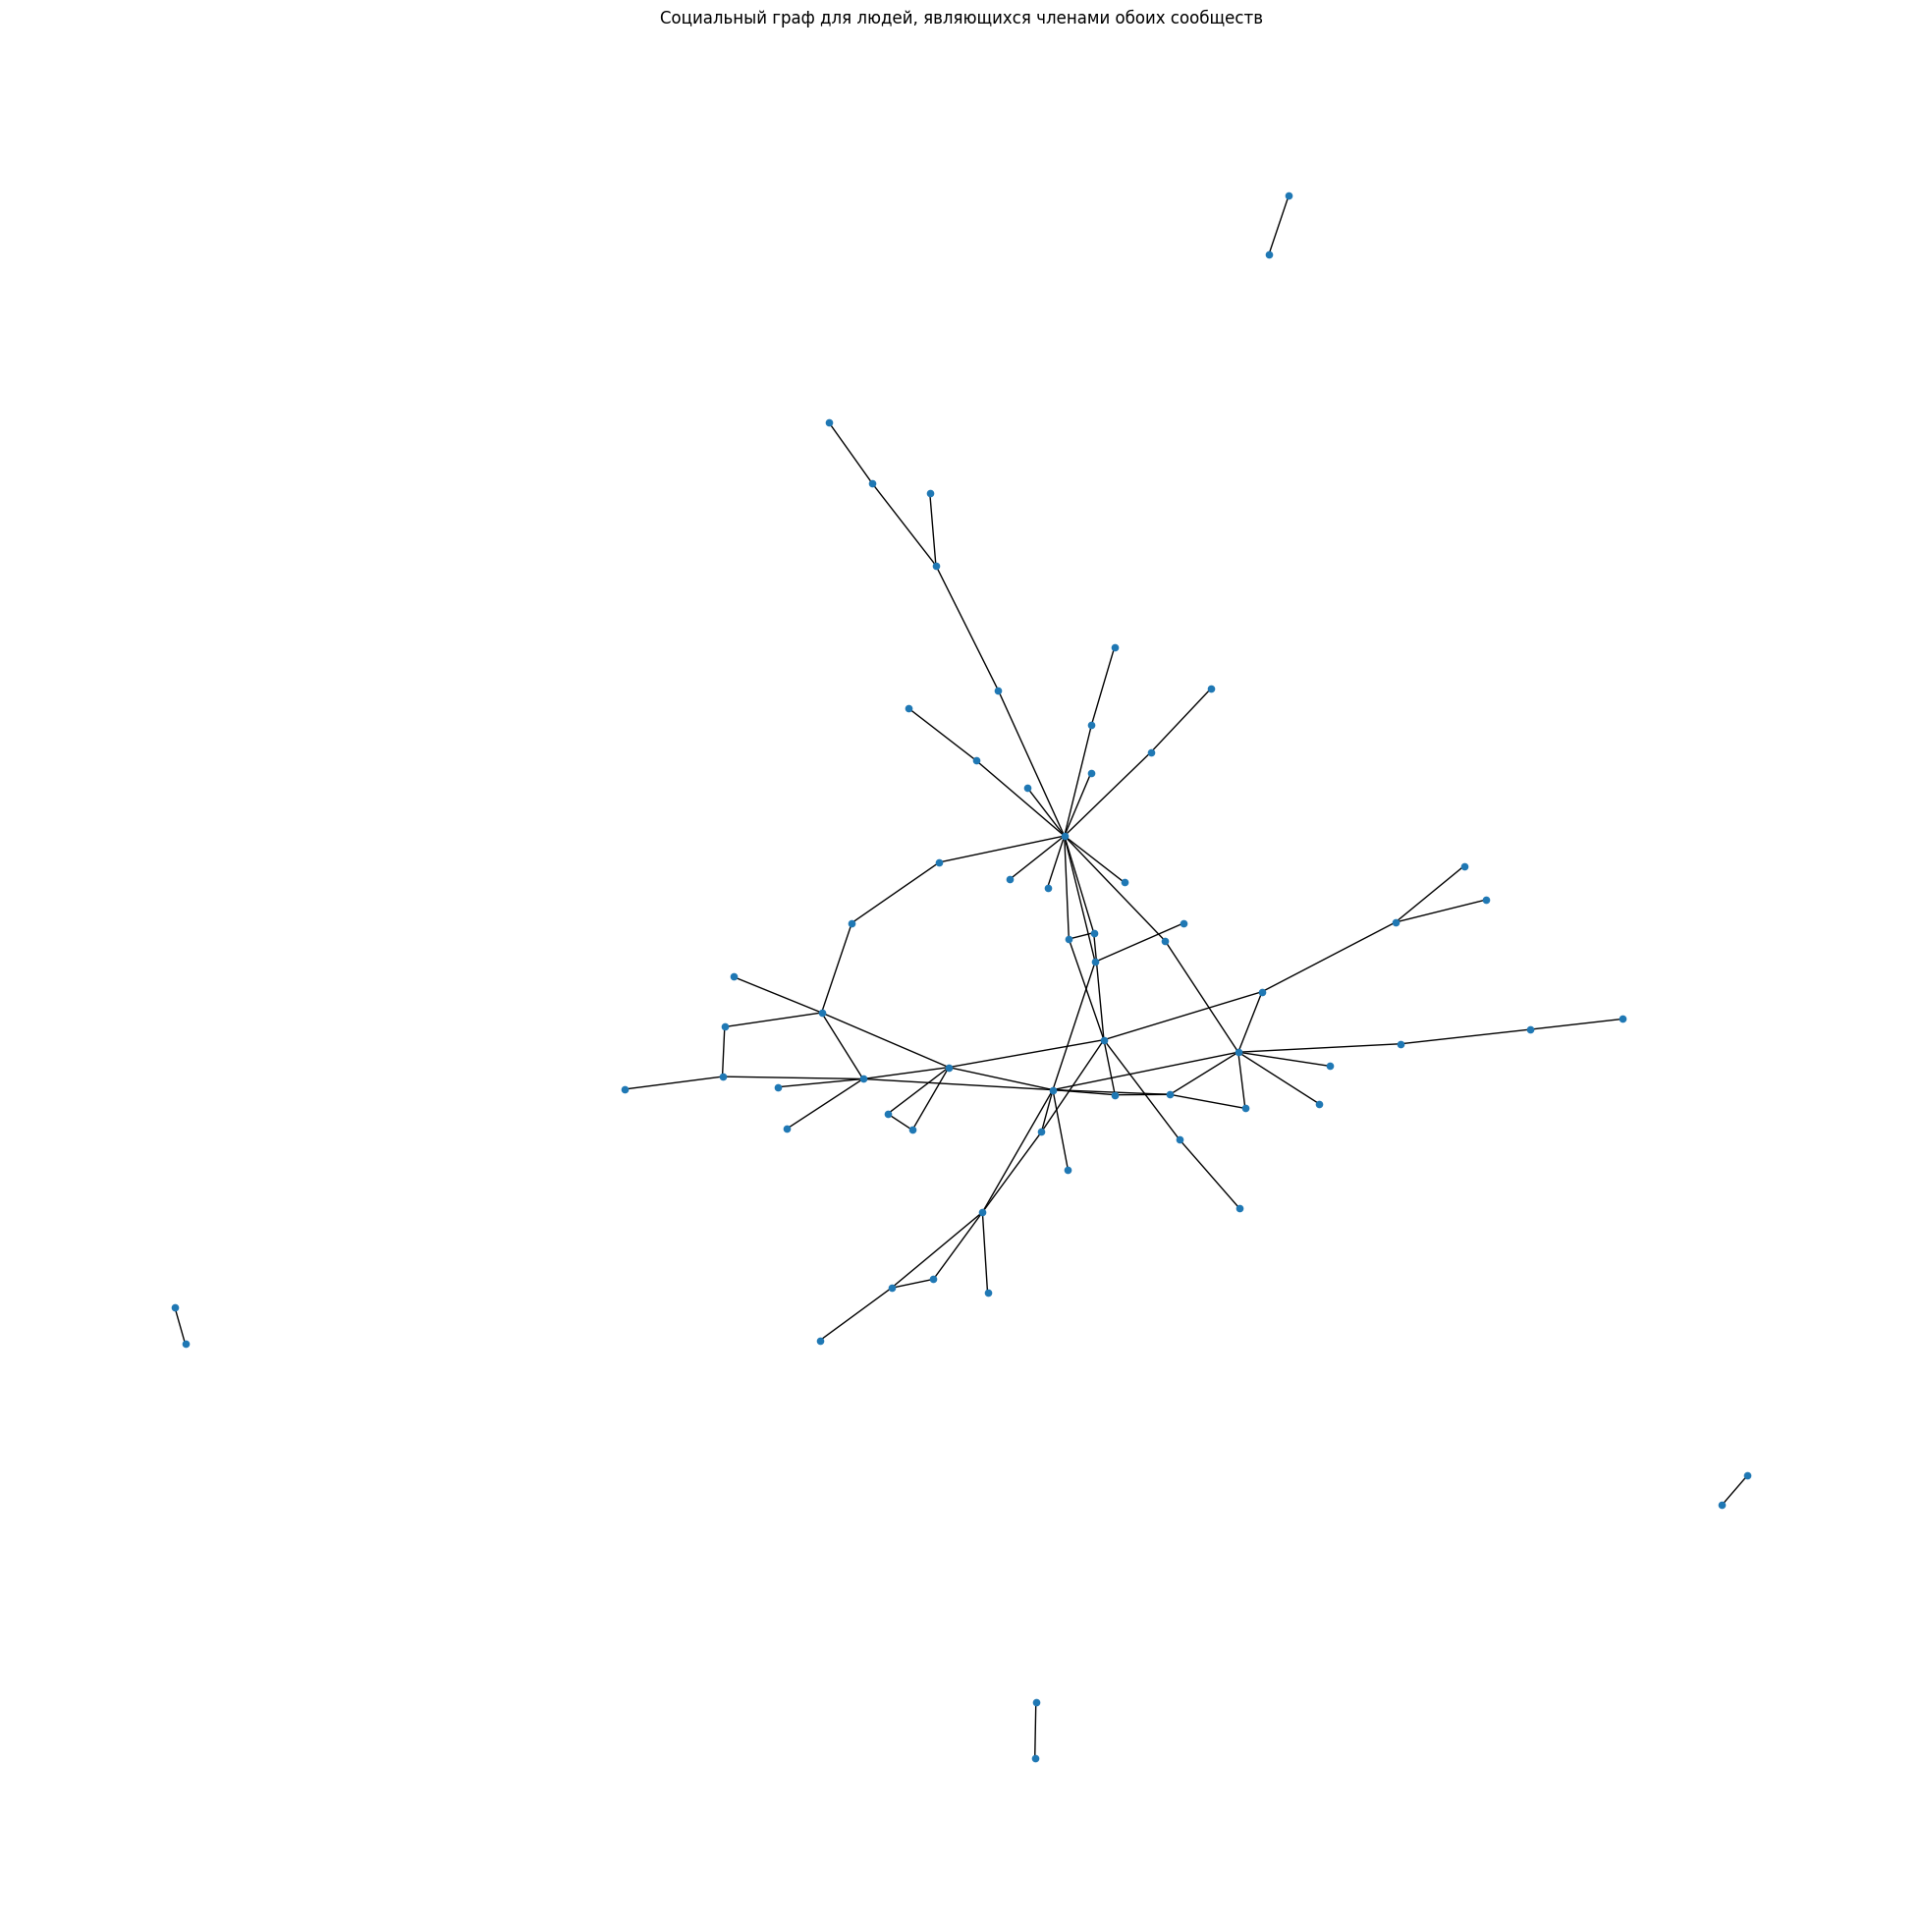

In [5]:
plt.figure(figsize=(25, 25))                                                # Задаём размер графика для неориентированного социального графа
plt.title('Социальный граф для людей, являющихся членами обоих сообществ, неориентированный')
nx.draw(G1, node_size=20)                                                   # Отрисовываем граф с размером вершины = 20
plt.show()                                                                  # Выводим граф

# ***Поиск наиболее авторитетных пользователей***

1) https://habr.com/ru/post/715386/  \
2) https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [6]:
a = nx.betweenness_centrality(G)        # Для поиска наиболее авторитетных пользователей на ориентированном графе выбираем центральность посредничества
result = a.items()                      # Достаём ID пользователей и полученные для них значения центральности и
data = list(result)                     # помещаем их в список,
arrayG = np.array(data)                 # после чего помещаем их в массив
for i in range(len(arrayG)):            # Создаём цикл for, который проходит по каждому значению центральности в нём и переводит это значение в формат float без использования e^(-x)
  arrayG[i][1] = Decimal(arrayG[i][1])

In [7]:
df = pd.DataFrame(arrayG)                                                   # Создаём датасет с ID и изменёнными значениями центральности
df = df.rename(columns={df.columns[0]: 'ID', df.columns[1]: 'Centrality'})  # Переименовываем название столбцов
df = df.sort_values(by='Centrality', ascending=False)                       # Сортируем по мере уменьшения центральности
df[0:10]                                                                    # Выводим топ-10

,ID,Centrality
18,155846028,0.20535742035742036
33,144735090,0.16442501942501941
19,463569168,0.15987567987567988
1,5379200,0.13185703185703188
17,155218497,0.11613442113442111
22,69518491,0.1003108003108003
5,227014,0.08158508158508158
12,435009255,0.06705516705516706
8,70936303,0.05975135975135976
30,157040051,0.05205128205128205


In [8]:
b = nx.betweenness_centrality(G1)         # Для поиска наиболее авторитетных пользователей на неориентированном графе мы выбрали центральность посредничества
result = b.items()                        # Достаём ID пользователей и полученные для них значения центральности и
data = list(result)                       # помещаем их в список,
arrayG1 = np.array(data)                  # после чего помещаем их в массив
for i in range(len(arrayG1)):             # Создаём цикл for, который проходит по каждому значению центральности в нём и
  arrayG1[i][1] = Decimal(arrayG1[i][1])  # переводит это значение в формат float без использования e^(-x)

In [9]:
df = pd.DataFrame(arrayG1)                                                  # Создаём датасет с ID и изменёнными значениями центральности
df = df.rename(columns={df.columns[0]: 'ID', df.columns[1]: 'Centrality'})  # Переименовываем название столбцов
df = df.sort_values(by='Centrality', ascending=False)                       # Сортируем по мере уменьшения центральности
df[0:10]                                                                    # Выводим топ-10

,ID,Centrality
33,144735090,0.3898290598290598
18,155846028,0.27924630924630933
1,5379200,0.18975135975135984
19,463569168,0.1567987567987568
57,709276449,0.1431235431235431
22,69518491,0.11836829836829837
17,155218497,0.10264957264957267
5,227014,0.1020979020979021
61,126346259,0.10069930069930069
12,435009255,0.08958818958818958


# ***Вычисление плотности социального графа***

1) https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

In [10]:
nx.density(G)  # Плотность ориентированного графа

0.03143374038896427

In [11]:
nx.density(G1)  # Плотность неориентированного графа

0.03573043871551334

# ***Проверка графа на связность***

Для ориентированного графа не работает \
1) https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_connected.html

In [12]:
nx.is_connected(G1)  # Проверка неориентированного графа на связность

False

# ***Расчёт максимального, минимального и среднего значения степени узлов графа***

1) https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html

In [13]:
degrees = [val for (node, val) in G.degree()]                             # Достаём значения степеней узлов ориентированного графа и помещаем их в массив
print("Максимальная степень узла ориентированного графа:", max(degrees))  # Выводим максимальное значение степени узла
print("Минимальная степень узла ориентированного графа:", min(degrees))   # Выводим минимальное значение степени узла
print("Средняя степень узла ориентированного графа:", mean(degrees))      # Выводим среднее значение степени узла

Максимальная степень узла ориентированного графа: 19
Минимальная степень узла ориентированного графа: 1
Средняя степень узла ориентированного графа: 4.149253731343284


In [17]:
degrees = [val for (node, val) in G1.degree()]                            # Достаём значения степеней узлов неориентированного графа и помещаем их в массив
print("Максимальная степень узла неориентированного графа:", max(degrees))  # Выводим максимальное значение степени узла
print("Минимальная степень узла неориентированного графа:", min(degrees))   # Выводим минимальное значение степени узла
print("Средняя степень узла неориентированного графа:", mean(degrees))      # Выводим среднее значение степени узла

Максимальная степень узла неориентированного графа: 14
Минимальная степень узла неориентированного графа: 1
Средняя степень узла неориентированного графа: 2.3582089552238807


# ***Расчёт модулярности графа***

Не работает для ориентированного графа \
1) https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html  \
2) https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html \
3) https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html


In [18]:
nx_comm.modularity(G1, nx_comm.label_propagation_communities(G1))  # Расчёт модулярности неориентированного графа с разбиением на сообщества с помощью метода библиотеки networkx

0.524755648133312

In [19]:
partition = nx.community.louvain_communities(G1)  # Метод Лувейна для разбиения на сообщества (его мы использовали в лабораторной работе №1)
nx_comm.modularity(G1, partition)              # Расчёт модулярности неориентированного графа с разбиением на сообщества с помощью метода Лувейна

0.645329274154783